In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [2]:
df=pd.read_csv('sbsspecial.csv', encoding='cp949')

In [3]:
df

,Unnamed: 0,tv,title,episode,date,link,synopsys
0,0,SBS,SBS 스페셜,복흥 O.B.A 소녀들은 자란다,2018.09.16(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 복흥 O.B.A소녀들은 자란다?방송일시: 2018년 9월 16일 일요일 밤 11...
1,1,SBS,SBS 스페셜,자영업 공화국의 눈물,2018.09.09(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 자영업 공화국의 눈물방송일시: 2018년 9월 9일(일) 밤 11시 5분연출: ...
2,2,SBS,SBS 스페셜,다시 쓰는 불면일기 잠은 죽어서 자나?!,2018.09.02(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ ??다시 쓰는 불면일기잠은 죽어서 자나?!방송일시 : 2018년 9월 2일(일)...
3,3,SBS,SBS 스페셜,아이와 여행하는 법,2018.08.12(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 아이와 여행하는 법방송일시: 2018년 8월 12일(일) 밤 11시 5분연출: ...
4,4,SBS,SBS 스페셜,영미네 작은 식탁,2018.08.05(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 영미네 작은 식탁방송일시: 2018년 8월 5일(일) 밤 11시 5분연출: 황성...
5,5,SBS,SBS 스페셜,2부작 블루존의 비밀 2부 파워나인을 실현하라,2018.07.29(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[]
6,6,SBS,SBS 스페셜,2부작 블루존의 비밀 1부 무엇이 죽음을 잊게 했나,2018.07.22(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 2부작 블루존의 비밀1부 무엇이 죽음을 잊게 했나방송일시: 2018년 7월 22...
7,7,SBS,SBS 스페셜,미스터리한 나의 어머니 황정례,2018.07.08(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 미스터리한 나의 어머니 황정례방송일시: 2018년 7월 8일(일) 밤 11시 5...
8,8,SBS,SBS 스페셜,식탁 위로 돌아 온 미세 플라스틱,2018.07.01(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 식탁 위로 돌아 온 미세 플라스틱방송일시: 2018년 7월 1일 일요일 밤 11...
9,9,SBS,SBS 스페셜,취준진담 역지사지 면접 프로젝트,2018.06.10(일),http://programs.sbs.co.kr/culture/sbsspecial/v...,[ 취준진담 역지사지 면접 프로젝트??방송일시: 2018년 6월 10일(...


### 결측치(NaN)있는 행 제거 한 시놉시스 

In [4]:
df2=df.dropna(axis=0)
#df.dropna(how="any")

In [5]:
df2['synopsys']

0      [ 복흥 O.B.A소녀들은 자란다?방송일시: 2018년 9월 16일 일요일 밤 11...
1      [ 자영업 공화국의 눈물방송일시: 2018년 9월 9일(일) 밤 11시 5분연출: ...
2      [ ??다시 쓰는 불면일기잠은 죽어서 자나?!방송일시 : 2018년 9월 2일(일)...
3      [ 아이와 여행하는 법방송일시: 2018년 8월 12일(일) 밤 11시 5분연출: ...
4      [ 영미네 작은 식탁방송일시: 2018년 8월 5일(일) 밤 11시 5분연출: 황성...
5                                                     []
6      [ 2부작 블루존의 비밀1부 무엇이 죽음을 잊게 했나방송일시: 2018년 7월 22...
7      [ 미스터리한 나의 어머니 황정례방송일시: 2018년 7월 8일(일) 밤 11시 5...
8      [ 식탁 위로 돌아 온 미세 플라스틱방송일시: 2018년 7월 1일 일요일 밤 11...
9      [       취준진담 역지사지 면접 프로젝트??방송일시: 2018년 6월 10일(...
10     [ 담 판 ??트럼프 vs 김정은, 그들의 선택은?방송일시: 2018년 6월 3일(...
11     [ 행복한? 부부생활을? 위한졸혼 연습방송일시: 2018년 5월 27일(일) 밤 1...
12     [ 84년생 김정은과 장마당 세대방송일시: 2018년 5월 20일 일요일 밤 11시...
13     [ 앵그리맘의 반격방송일시: 2018년 5월 13일 일요일 밤 11시 5분연출: 백...
14     [ 스마트폰 전쟁내 아이를 위한 스마트폰 사용설명서방송일시: 2018년 5월 6일 ...
15     [ 남북정상회담 특집SBS스페셜여섯 개의 봄방송일시: 2018년 4월 29일(일) ...
16     [ \n\n\n\n\n???新 한류 어벤저스 - 왕서방이 다시 온다??방송일시: 2...
17     [ 고독한 우주인지구 귀환 3649일째?방송

In [6]:
from soynlp.tokenizer import RegexTokenizer, LTokenizer, MaxScoreTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [7]:
#샘플로 볼 인덱스
sample_index=0

In [23]:
sample_title=df2['episode'][sample_index]
sample_title

'복흥 O.B.A 소녀들은 자란다'

In [26]:
sample_synop=df2['synopsys'][sample_index]
sample_synop

'[ 복흥 O.B.A소녀들은 자란다?방송일시: 2018년 9월 16일 일요일 밤 11시 5분?연출: 안윤태 / 글·구성: 이은정# 사춘기 자녀를 둔 부모들에게     아이를 키우는 부모라면 자녀와 말이 통하지 않아?답답해 한 적이 한 번 쯤은 있을 것이다.?자녀가 사춘기에 접어들었다면?어쩌면 아이와 이야기를 나누는 매 순간이?마치 도심 교통체증처럼?꽉 막혀버렸다고 느낀 적도 많을 것이다.?하지만 어느 순간 문득,??부모 앞에서 입을 닫아버린 내 아이가?어떤 생각과 어떤 고민을 하며 살고 있을까 하고 궁금해진다.?걱정도 되고 궁금하기도 하고...?그래서 또 다시 대화를 시도해 보지만?사춘기 아이는 도무지 속내를 털어놓을 생각이 없다.?내 아이는 도대체 무슨 생각을 하며 살고 있을까??여기, ‘질풍노도의 시기를 보내고 있는?내 아이가?과연 잘 자라고 있는 걸까?’ 라는 의문을 가진 부모들에게 전하고 싶은,?평범하지만 조금은 특별한 ‘소녀들의 이야기’가 있다.# 4인 4색!? 14살 시골 소녀들          전라북도 순창읍에서 꼬불꼬불 산길을 따라?차를 타고 40분을 더 들어가야 도착할 수 있는 복흥면,?이곳에 전교생 23명의 작은 중학교에 다니는?4명의 1학년 소녀들이 살고 있다.?밝고 활달한 성격을 가진 ‘걸크러시’ 정현이,?말투도 행동도 느리지만 공부를 제일 잘 하는 ‘늘보’ 수아,?뭐든지 잘 하고 싶은 욕심이 강한 ‘승부욕 여신’ 수련이,?서울에서 전학 온 지 6개월 밖에 되지 않은 ‘아직은 서울소녀’ 아영이...?성격도 다르고 살아온 환경도 제각각이지만?서로를 ‘베스트프렌드’ 라고 말하며?항상 붙어 다니는 이 소녀들은?어떤 생각과 고민을 하며 살아가고 있을까?# 어른들은 모르는 10대 소녀들의 진짜 이야기     썸인지 연애인지... 마음을 고백해온 중3 오빠와의 관계를 고민하고,?공부를 잘 하면 원하는 꿈을 이루고?행복해 질 수 있을지도 모른다고 생각하기도 한다.?때론 엉뚱하고 때론 진지하게...?흘러가는 구름을 보며 삶과 행복을 고민하기도 하는...

## 토큰화

In [27]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['복흥', 'O', '.', 'B', '.', 'A', '소녀들은', '자란다']

In [28]:
tokened_synop=tokenizer.tokenize(sample_synop)
tokened_synop

['[',
 '복흥',
 'O',
 '.',
 'B',
 '.',
 'A',
 '소녀들은',
 '자란다',
 '?',
 '방송일시',
 ':',
 '2018',
 '년',
 '9',
 '월',
 '16',
 '일',
 '일요일',
 '밤',
 '11',
 '시',
 '5',
 '분',
 '?',
 '연출',
 ':',
 '안윤태',
 '/',
 '글',
 '·',
 '구성',
 ':',
 '이은정',
 '#',
 '사춘기',
 '자녀를',
 '둔',
 '부모들에게',
 '아이를',
 '키우는',
 '부모라면',
 '자녀와',
 '말이',
 '통하지',
 '않아',
 '?',
 '답답해',
 '한',
 '적이',
 '한',
 '번',
 '쯤은',
 '있을',
 '것이다',
 '.?',
 '자녀가',
 '사춘기에',
 '접어들었다면',
 '?',
 '어쩌면',
 '아이와',
 '이야기를',
 '나누는',
 '매',
 '순간이',
 '?',
 '마치',
 '도심',
 '교통체증처럼',
 '?',
 '꽉',
 '막혀버렸다고',
 '느낀',
 '적도',
 '많을',
 '것이다',
 '.?',
 '하지만',
 '어느',
 '순간',
 '문득',
 ',??',
 '부모',
 '앞에서',
 '입을',
 '닫아버린',
 '내',
 '아이가',
 '?',
 '어떤',
 '생각과',
 '어떤',
 '고민을',
 '하며',
 '살고',
 '있을까',
 '하고',
 '궁금해진다',
 '.?',
 '걱정도',
 '되고',
 '궁금하기도',
 '하고',
 '...?',
 '그래서',
 '또',
 '다시',
 '대화를',
 '시도해',
 '보지만',
 '?',
 '사춘기',
 '아이는',
 '도무지',
 '속내를',
 '털어놓을',
 '생각이',
 '없다',
 '.?',
 '내',
 '아이는',
 '도대체',
 '무슨',
 '생각을',
 '하며',
 '살고',
 '있을까',
 '??',
 '여기',
 ',',
 '‘',
 '질풍노도의',
 '시기를',
 '보내고',
 '있는',
 '?',

### 데이터 전처리

In [17]:
import re

In [18]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [29]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = df2['synopsys'].apply(preprocessing)

Wall time: 1.99 ms


In [30]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

Wall time: 1.29 s


0    [[, 복흥, O, ., B, ., A, 소녀들은, 자란다, ?, 방송일시, :, ...
1    [[, 자영업, 공화국의, 눈물방송일시, :, 2018, 년, 9, 월, 9, 일,...
2    [[, ??, 다시, 쓰는, 불면일기잠은, 죽어서, 자나, ?!, 방송일시, :, ...
Name: synopsys, dtype: object

In [31]:
tokens[sample_index][:100]

['[',
 '복흥',
 'O',
 '.',
 'B',
 '.',
 'A',
 '소녀들은',
 '자란다',
 '?',
 '방송일시',
 ':',
 '2018',
 '년',
 '9',
 '월',
 '16',
 '일',
 '일요일',
 '밤',
 '11',
 '시',
 '5',
 '분',
 '?',
 '연출',
 ':',
 '안윤태',
 '/',
 '글',
 '·',
 '구성',
 ':',
 '이은정',
 '#',
 '사춘기',
 '자녀를',
 '둔',
 '부모들에게',
 '아이를',
 '키우는',
 '부모라면',
 '자녀와',
 '말이',
 '통하지',
 '않아',
 '?',
 '답답해',
 '한',
 '적이',
 '한',
 '번',
 '쯤은',
 '있을',
 '것이다',
 '.?',
 '자녀가',
 '사춘기에',
 '접어들었다면',
 '?',
 '어쩌면',
 '아이와',
 '이야기를',
 '나누는',
 '매',
 '순간이',
 '?',
 '마치',
 '도심',
 '교통체증처럼',
 '?',
 '꽉',
 '막혀버렸다고',
 '느낀',
 '적도',
 '많을',
 '것이다',
 '.?',
 '하지만',
 '어느',
 '순간',
 '문득',
 ',??',
 '부모',
 '앞에서',
 '입을',
 '닫아버린',
 '내',
 '아이가',
 '?',
 '어떤',
 '생각과',
 '어떤',
 '고민을',
 '하며',
 '살고',
 '있을까',
 '하고',
 '궁금해진다',
 '.?']

In [32]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

지정된 경로를 찾을 수 없습니다.


In [ ]:
#!pip install -q 'wordcloud[]'

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath,
                        stopwords = STOPWORDS, # 한국어는 해당이 없습니다. 한국어를 적용해 주려면 별도 처리가 필요합니다.
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

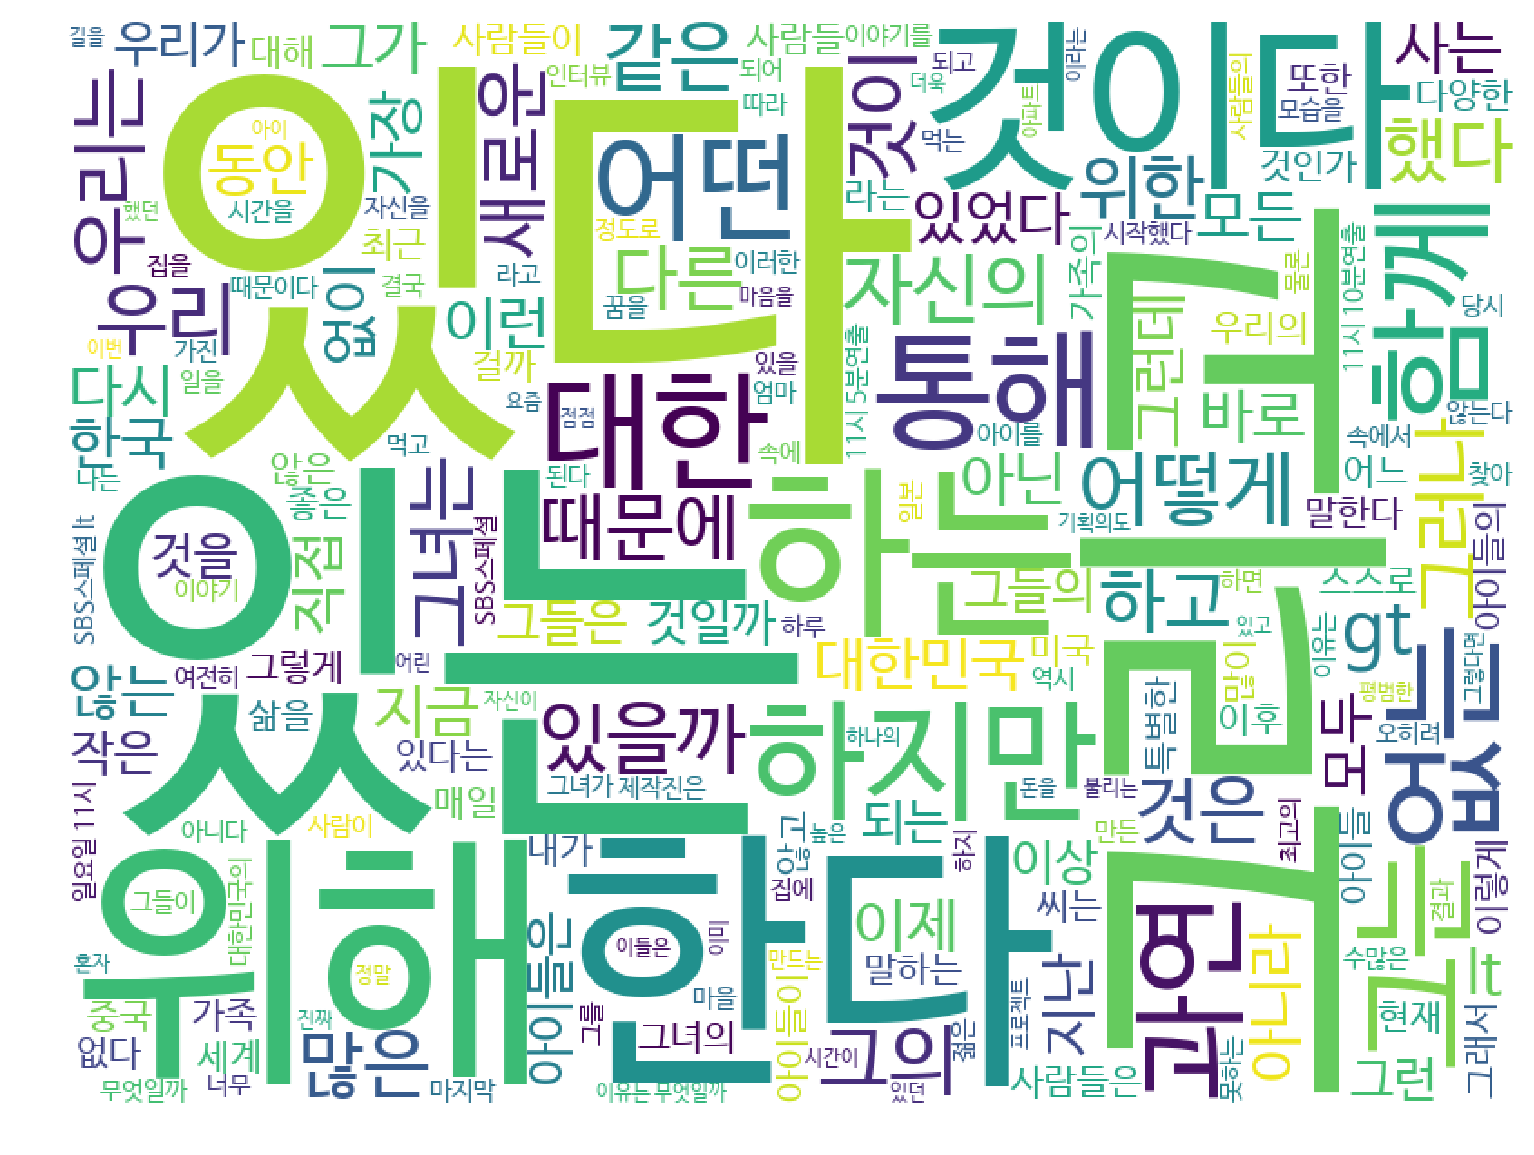

Wall time: 6.9 s


In [36]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(sentences))

In [37]:
from soynlp.noun import LRNounExtractor

In [38]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed-------------------------------- (0.224 %)
(L,R) has (10460, 5576) tokens
building lr-graph completedWall time: 1.37 s


In [39]:
nouns

{'신라': NounScore(frequency=5, score=0.9790580000000001, known_r_ratio=0.6),
 '설명': NounScore(frequency=13, score=0.8554654285714286, known_r_ratio=0.5833333333333334),
 '조정': NounScore(frequency=5, score=0.99986, known_r_ratio=1.0),
 '수백': NounScore(frequency=11, score=0.951425, known_r_ratio=0.5),
 '취직': NounScore(frequency=6, score=0.9867873333333333, known_r_ratio=0.6),
 '도쿄': NounScore(frequency=9, score=0.5010715, known_r_ratio=0.8),
 '설립': NounScore(frequency=7, score=0.9009447999999999, known_r_ratio=0.7142857142857143),
 '제작': NounScore(frequency=92, score=0.7202435555555555, known_r_ratio=0.10714285714285714),
 '어제': NounScore(frequency=10, score=0.6988496666666667, known_r_ratio=0.8571428571428571),
 '퇴임': NounScore(frequency=8, score=0.9944365, known_r_ratio=1.0),
 '제기': NounScore(frequency=6, score=0.9946315, known_r_ratio=0.4),
 '효과': NounScore(frequency=32, score=0.9987683157894737, known_r_ratio=0.76),
 '외출': NounScore(frequency=10, score=0.612294875, known_r_ratio=0.888

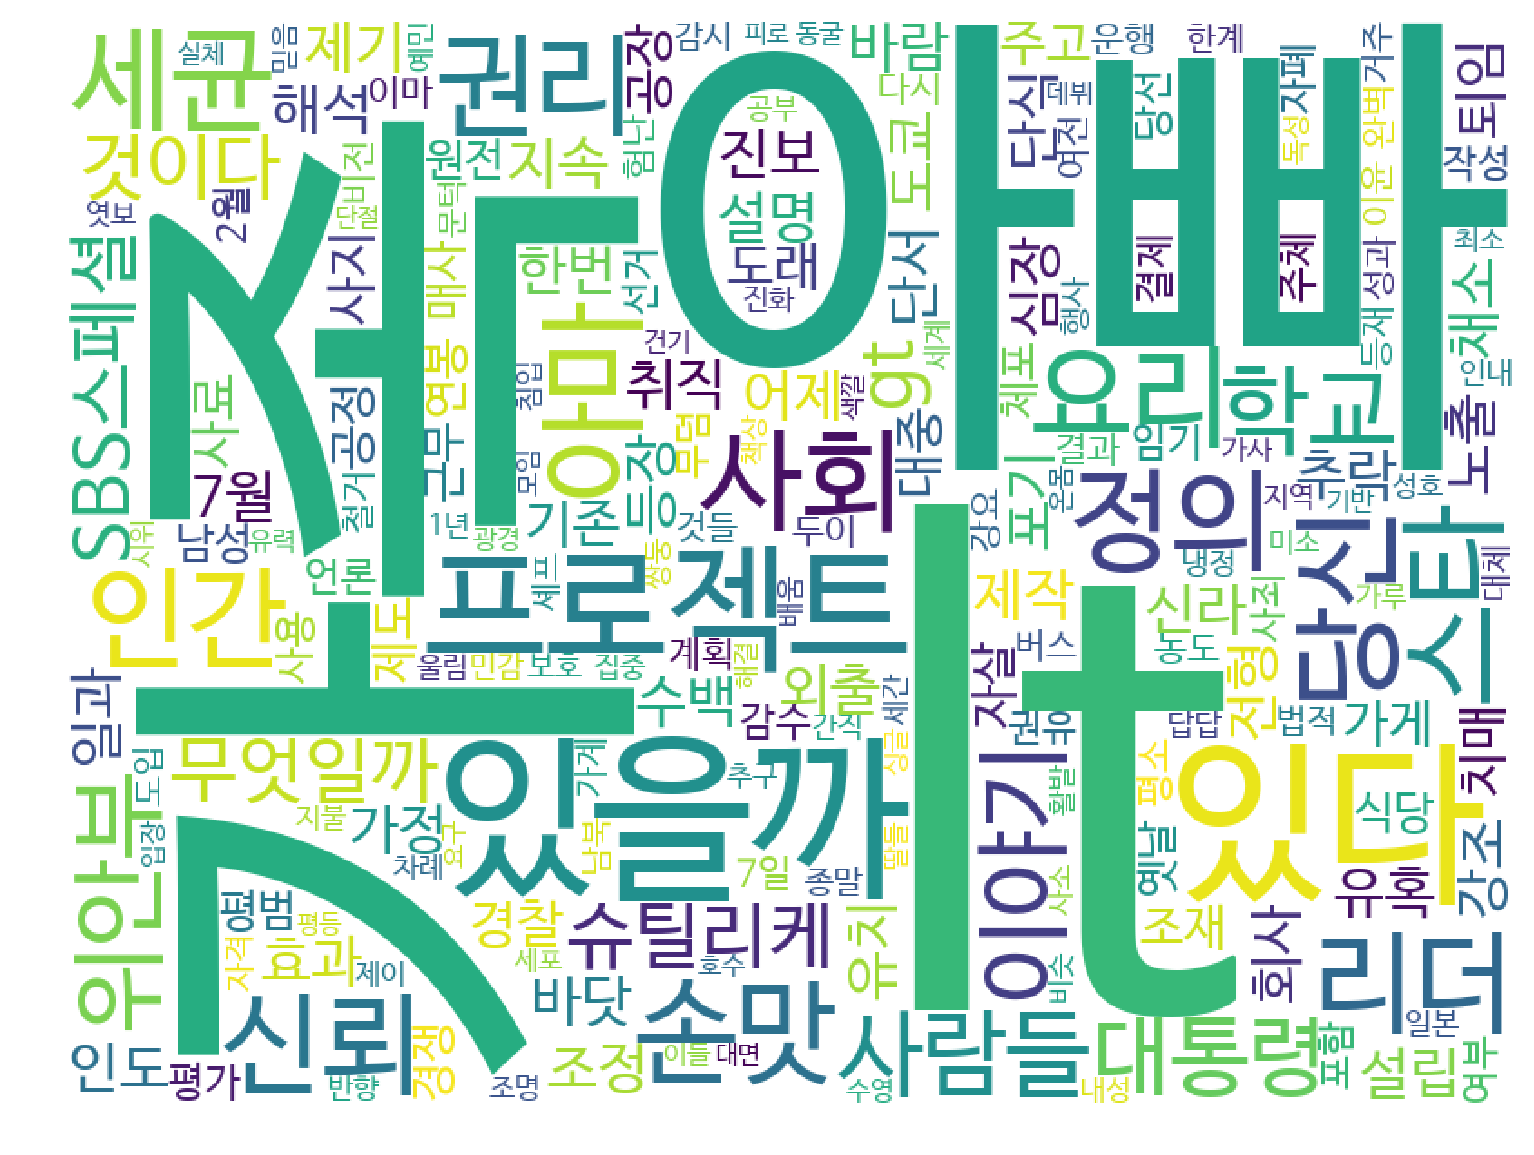

Wall time: 4.33 s


In [40]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))

In [41]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['수', '현','꼭', '있는','펼쳐진다.', '있습니다','그', '합니다', '하는', '및', '제', '할', '하고', '더', '대한', '한', '그리고', '월', '저는', '없는', '입니다', '등', '일', '많은', '이런', '것은', '왜','같은', '같습니다', '없습니다', '위해', '한다']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [43]:
remove_stopwords(sample_synop)

'[ 복흥 O.B.A소녀들은 자란다?방송일시: 2018년 9월 16일 일요일 밤 11시 5분?연출: 안윤태 / 글·구성: 이은정# 사춘기 자녀를 둔 부모들에게     아이를 키우는 부모라면 자녀와 말이 통하지 않아?답답해 적이 번 쯤은 있을 것이다.?자녀가 사춘기에 접어들었다면?어쩌면 아이와 이야기를 나누는 매 순간이?마치 도심 교통체증처럼?꽉 막혀버렸다고 느낀 적도 많을 것이다.?하지만 어느 순간 문득,??부모 앞에서 입을 닫아버린 내 아이가?어떤 생각과 어떤 고민을 하며 살고 있을까 궁금해진다.?걱정도 되고 궁금하기도 하고...?그래서 또 다시 대화를 시도해 보지만?사춘기 아이는 도무지 속내를 털어놓을 생각이 없다.?내 아이는 도대체 무슨 생각을 하며 살고 있을까??여기, ‘질풍노도의 시기를 보내고 있는?내 아이가?과연 잘 자라고 걸까?’ 라는 의문을 가진 부모들에게 전하고 싶은,?평범하지만 조금은 특별한 ‘소녀들의 이야기’가 있다.# 4인 4색!? 14살 시골 소녀들          전라북도 순창읍에서 꼬불꼬불 산길을 따라?차를 타고 40분을 들어가야 도착할 복흥면,?이곳에 전교생 23명의 작은 중학교에 다니는?4명의 1학년 소녀들이 살고 있다.?밝고 활달한 성격을 가진 ‘걸크러시’ 정현이,?말투도 행동도 느리지만 공부를 제일 잘 ‘늘보’ 수아,?뭐든지 잘 싶은 욕심이 강한 ‘승부욕 여신’ 수련이,?서울에서 전학 온 지 6개월 밖에 되지 않은 ‘아직은 서울소녀’ 아영이...?성격도 다르고 살아온 환경도 제각각이지만?서로를 ‘베스트프렌드’ 라고 말하며?항상 붙어 다니는 이 소녀들은?어떤 생각과 고민을 하며 살아가고 있을까?# 어른들은 모르는 10대 소녀들의 진짜 이야기     썸인지 연애인지... 마음을 고백해온 중3 오빠와의 관계를 고민하고,?공부를 잘 하면 원하는 꿈을 이루고?행복해 질 있을지도 모른다고 생각하기도 한다.?때론 엉뚱하고 때론 진지하게...?흘러가는 구름을 보며 삶과 행복을 고민하기도 하는...?한번 터지면 누구도 막을 없는?웃음 폭탄을 